<img src="img/feature.png">
<img src="img/feature2.png">
<img src="img/feature3.png">

- https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html

In [12]:
import cv2
import matplotlib.pyplot as plt

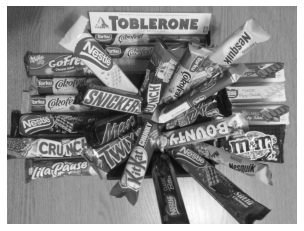

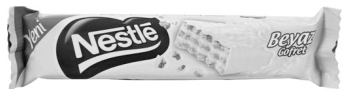

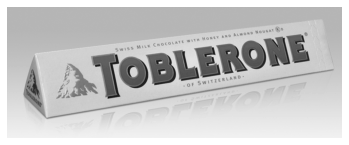

In [13]:
# main image
chocolates = cv2.imread("img/chocolates.jpg", 0)
plt.figure(), plt.imshow(chocolates, cmap = "gray"),plt.axis("off")

# image to search
nestle = cv2.imread("img/nestle.jpg", 0)
plt.figure(), plt.imshow(nestle, cmap = "gray"),plt.axis("off")

toblerone = cv2.imread("img/toblerone.jpg", 0)
plt.figure(), plt.imshow(toblerone, cmap = "gray"),plt.axis("off")
plt.show()

- ORB detector ana görüntü ve aranılan resim arasındaki anahtar noktaları tespit eder.
- Bu anahtar noktalar(keypoints): corner-edge gbi nesneye ait özellikler

In [14]:
# Initiate ORB detector 
orb = cv2.ORB_create()

In [15]:
# find the keypoints with ORB
keypoint1, descriptor1 = orb.detectAndCompute(nestle, None) # Mask=None
keypoint2, descriptor2 = orb.detectAndCompute(toblerone, None)
keypoint3, descriptor3 = orb.detectAndCompute(chocolates, None)

In [16]:
# bf matcher => for matching the keypoints
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
# matching points
matches1 = bf.match(descriptor1, descriptor3) # nestle vs all chocolates
matches2 = bf.match(descriptor2, descriptor3) # toblerone vs all chocolates

In [17]:
# sort by distance
matches1 = sorted(matches1, key = lambda x: x.distance)
matches2 = sorted(matches2, key = lambda x: x.distance)

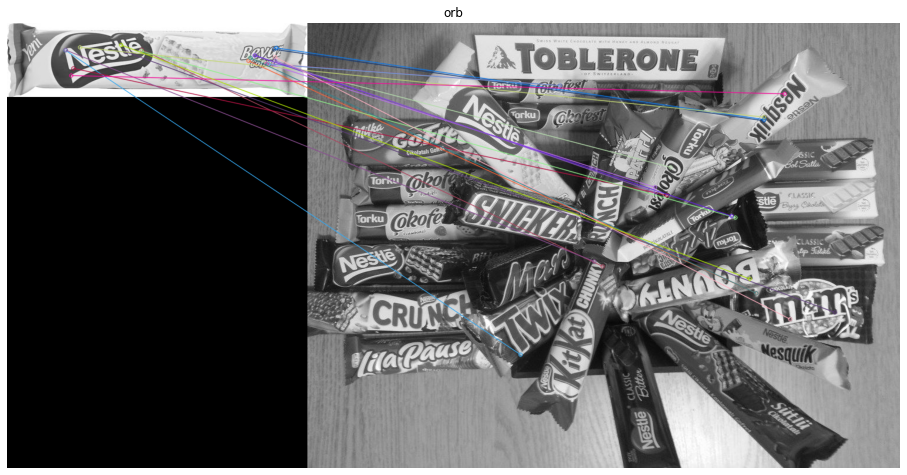

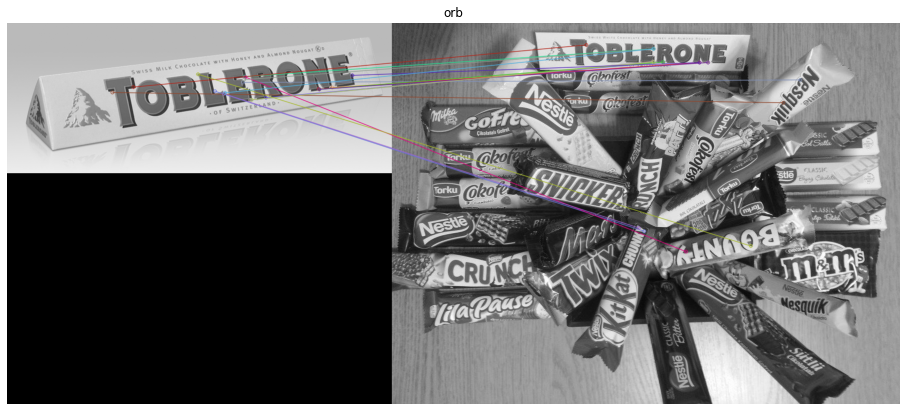

In [18]:
# visualize matching pictures
plt.figure(figsize=(16,9))
img_match1 = cv2.drawMatches(nestle, keypoint1, chocolates, keypoint3, matches1[:20], None, flags = 2)
plt.imshow(img_match1), plt.axis("off"), plt.title("orb")

plt.figure(figsize=(16,9))
img_match2 = cv2.drawMatches(toblerone, keypoint2, chocolates, keypoint3, matches2[:20], None, flags = 2)
plt.imshow(img_match2), plt.axis("off"), plt.title("orb")

plt.show()

Yukarıdaki plotlara göree,
- Nestle çikolata eşleşmesi başarız olmuştur, çünkü ana resimde nestle çikolatası eğik durmaktadır. Bunu eşleştirememiştir.
- Toblerone eşleştirmesi başarılı denilebilir, birçok harf başarılı bir şekilde eşleştirilmiştir.
Nestle çikolatasını eşleştirmek için, orb'dan daha iyi olan *sift* modülü kullanılır.

```python
$ pip uninstall opencv-python

$ pip uninstall opencv-contrib-python

```
and then type the following commands

```python
$ pip install opencv-contrib-python==4.5.5.64

$ pip install opencv-python==4.5.5.64


```

In [19]:
# for install: first uninstallpip install opencv-contrib-python==4.5.5.64
sift = cv2.xfeatures2d.SIFT_create()

In [20]:
# find the keypoints with ORB
keypoint1, descriptor1 = sift.detectAndCompute(nestle, None) # Mask=None
keypoint2, descriptor2 = sift.detectAndCompute(toblerone, None)
keypoint3, descriptor3 = sift.detectAndCompute(chocolates, None)

In [21]:
# bf matcher => for matching the keypoints
bf = cv2.BFMatcher()
# matching points
matches1 = bf.knnMatch(descriptor1, descriptor3, k = 2) # nestle vs all chocolates
matches2 = bf.knnMatch(descriptor2, descriptor3, k = 2) # toblerone vs all chocolates

In [22]:
best_matches1 = [] # for nestle vs all chocolates
best_matches2 = [] # for toblerone vs all chocolates

In [25]:
for match1, match2 in matches1: # there are 2 best match in matches1, because k = 2 ! :)
    
    if match1.distance < 0.75 * match2.distance: # chosen 0.5 in literature.
        best_matches1.append([match1])
    # else: worst match => not necessary
    
for match1, match2 in matches2:
    
    if match1.distance < 0.75 * match2.distance:
        best_matches2.append([match1])

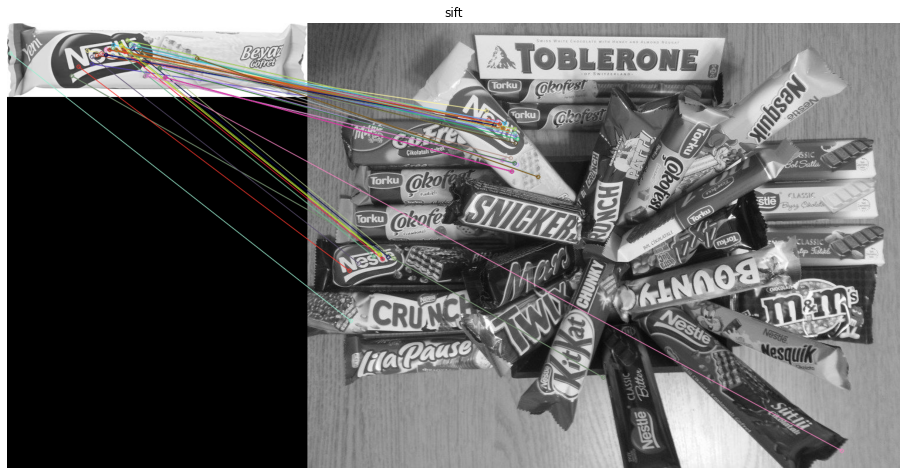

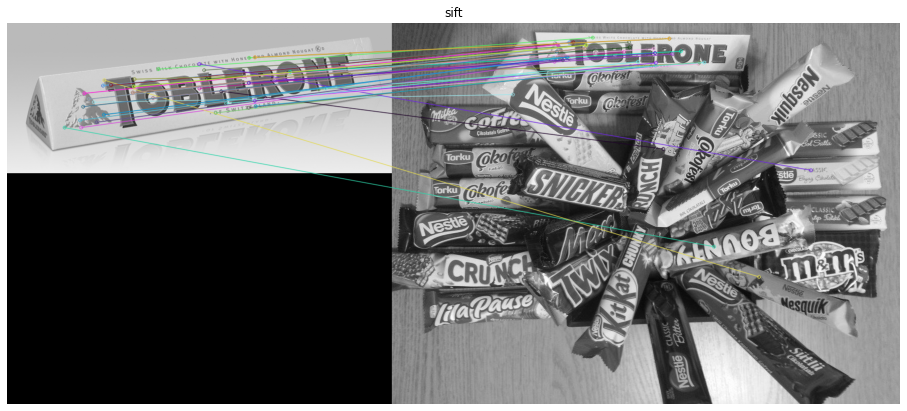

In [26]:
# visualize matching pictures
plt.figure(figsize=(16,9))
sift_matches1 = cv2.drawMatchesKnn(nestle, keypoint1, chocolates, keypoint3, best_matches1, None, flags = 2)
plt.imshow(sift_matches1), plt.axis("off"), plt.title("sift")

plt.figure(figsize=(16,9))
sift_matches2 = cv2.drawMatchesKnn(toblerone, keypoint2, chocolates, keypoint3, best_matches2, None, flags = 2)
plt.imshow(sift_matches2), plt.axis("off"), plt.title("sift")

plt.show()

Yukarıdaki plota göre:
- Artık Nestle çikolata tespit edilebiliyor.
- Nestle sütlü çikolatayı ayrıca bitter çikolata olarak tahmin etmesi normal. Çünkü Feature Matching de renkler kullanılmaz. 
- Sütlü ve bitter çikolata görünüm itibariyle logodaki yazılar aynı olduğu için eşleşecektir.
- Ancak sütlü çikolata daki çikolata resmi özgün olduğundan ilk onunla eşleşecektir! :)
- toblorene çikolatası ise orb'a göre çok daha başarılı bir eşleştirme sonucu vermiştir.
- örneğin logodaki dağ resmini dahi eşleştirmiş, bu önemli bir sonuçtur.